In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('monthly_milk_production.csv',index_col='Date',parse_dates=True)
df.index.freq='MS'

In [10]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

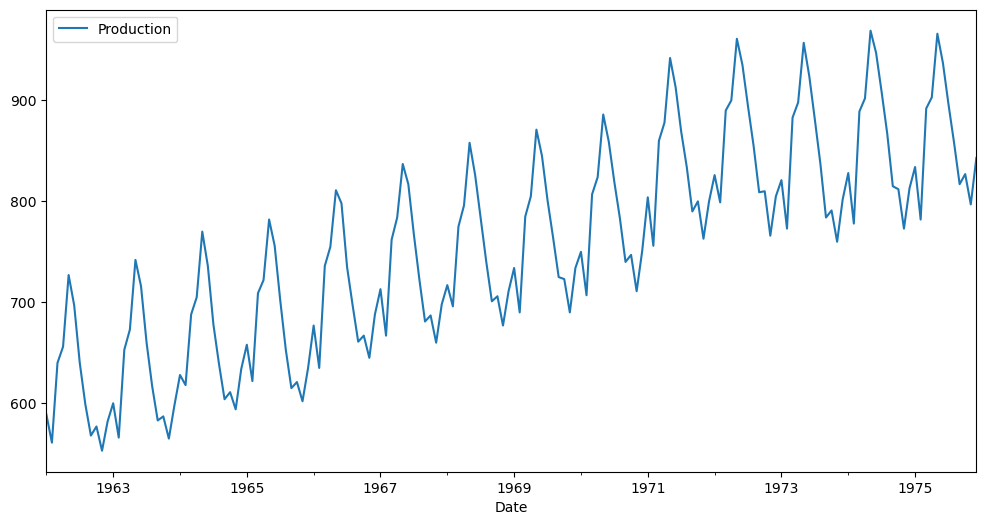

In [11]:
df.plot(figsize=(12,6))

In [14]:
#pip install statsmodels

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

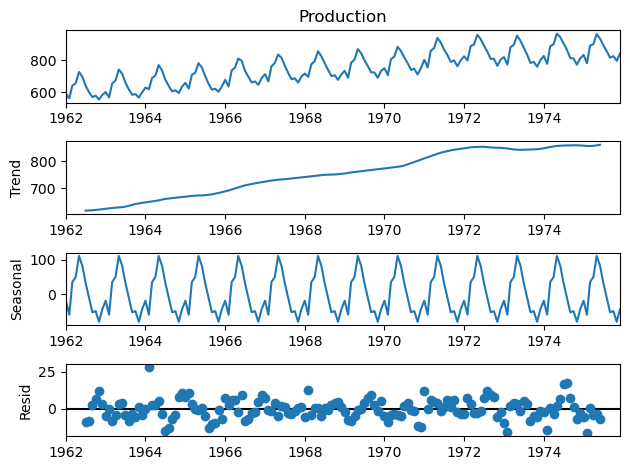

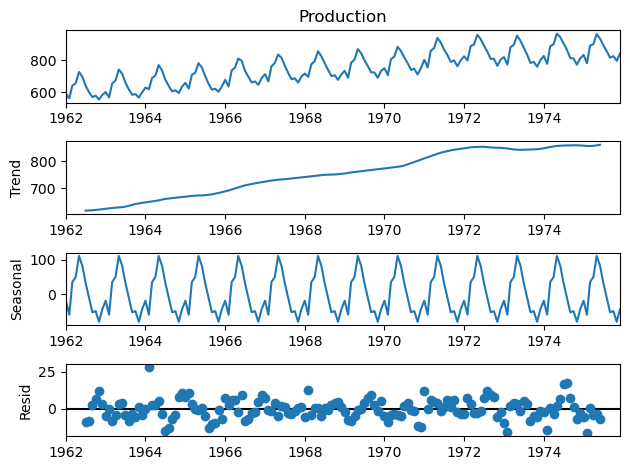

In [17]:
results=seasonal_decompose(df['Production'])
results.plot()

In [18]:
len(df)

168

In [19]:
train=df.iloc[:156]
test=df.iloc[156:]

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [22]:
df.head(),df.tail()

(            Production
 Date                  
 1962-01-01         589
 1962-02-01         561
 1962-03-01         640
 1962-04-01         656
 1962-05-01         727,
             Production
 Date                  
 1975-08-01         858
 1975-09-01         817
 1975-10-01         827
 1975-11-01         797
 1975-12-01         843)

In [23]:
scaler.fit(train)
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [24]:
scaled_train[:10]

array([[0.08653846],
       [0.01923077],
       [0.20913462],
       [0.24759615],
       [0.41826923],
       [0.34615385],
       [0.20913462],
       [0.11057692],
       [0.03605769],
       [0.05769231]])

In [25]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
n_input=3
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [28]:
X,y=generator[0]
print('f Given the Array: \n {X.flatten()}')
print('f Prediict this y: \n {y}')

f Given the Array: 
 {X.flatten()}
f Prediict this y: 
 {y}


In [29]:
X.shape

(1, 3, 1)

In [30]:
n_input=12
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)

In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [32]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(generator,epochs=50)

Epoch 1/50
144/144 [==============================] - 2s 4ms/step - loss: 0.0376
Epoch 2/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0204
Epoch 3/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0167
Epoch 4/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0186
Epoch 5/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0089
Epoch 6/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0085
Epoch 7/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0046
Epoch 8/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0045
Epoch 9/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0041
Epoch 10/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0058
Epoch 11/50
144/144 [==============================] - 1s 4ms/step - loss: 0.0048
Epoch 12/50
144/144 [==============================] - 1s 5ms/step - loss: 0.0053
Epoch 13/50
144/144 [====

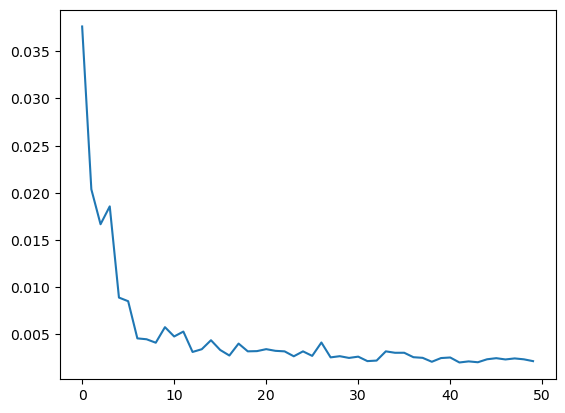

In [35]:
loss_per_epoch=model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [36]:
last_train_batch=scaled_train[-12:]


In [38]:
last_train_batch=last_train_batch.reshape((1,n_input,n_features))

In [39]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 170ms/step


array([[0.701415]], dtype=float32)

In [40]:
scaled_test[0]

array([0.67548077])

In [41]:
test_predictions=[]
first_eval_batch=scaled_train[-n_input:]
current_batch=first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 17ms/step


In [42]:
test_predictions

[array([0.701415], dtype=float32),
 array([0.66829], dtype=float32),
 array([0.8679442], dtype=float32),
 array([0.9321181], dtype=float32),
 array([1.0433058], dtype=float32),
 array([1.0249856], dtype=float32),
 array([0.9510363], dtype=float32),
 array([0.85053223], dtype=float32),
 array([0.7213323], dtype=float32),
 array([0.6845936], dtype=float32),
 array([0.61819535], dtype=float32),
 array([0.670023], dtype=float32)]

In [44]:
test.head()

,Production
Date,
1975-01-01,834
1975-02-01,782
1975-03-01,892
1975-04-01,903
1975-05-01,966


In [45]:
true_predictions=scaler.inverse_transform(test_predictions)

In [46]:
test['Predictions']=true_predictions

C:\Users\ahmet\AppData\Local\Temp\ipykernel_18732\2664784394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']=true_predictions


<Axes: xlabel='Date'>

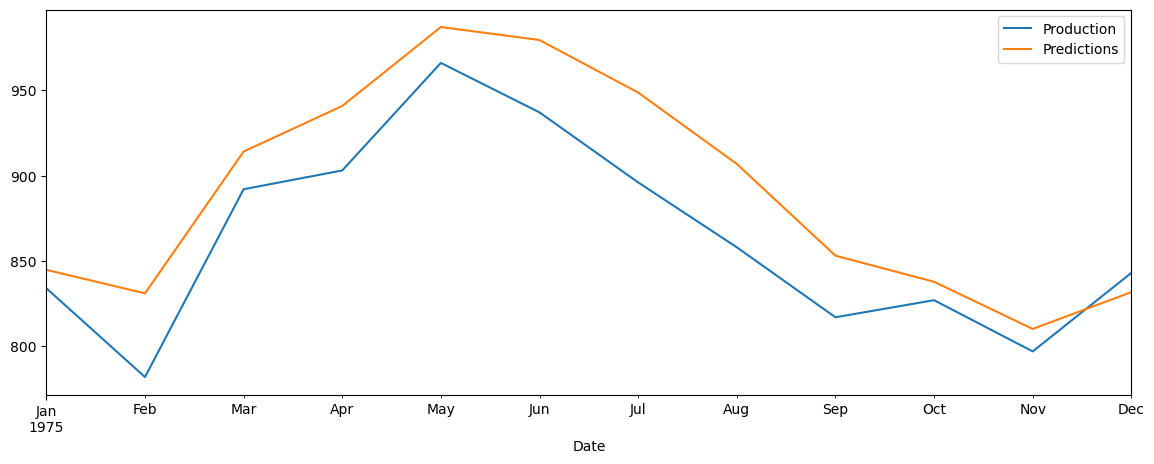

In [47]:
test.plot(figsize=(14,5))

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Production'],test['Predictions']))
print(rmse)

33.59277960982589
